<a href="https://colab.research.google.com/github/ananya0386/OvarianCancer_PBL/blob/main/OC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
data = pd.read_excel("/content/drive/MyDrive/PBL/Biomarker/Supplementary data 3.xlsx")

In [36]:
train_data.columns

Index(['TYPE', 'MPV', 'BASO#', 'PHOS', 'GLU.', 'K', 'AST', 'BASO%', 'Mg',
       'Menopause', 'CL', 'CEA', 'EO#', 'CA19-9', 'ALB', 'IBIL', 'GGT', 'MCH',
       'GLO', 'ALT', 'DBIL', 'Age', 'RDW', 'PDW', 'CREA', 'AFP', 'HGB', 'Na',
       'HE4', 'LYM#', 'CA125', 'BUN', 'LYM%', 'Ca', 'AG', 'MONO#', 'PLT',
       'NEU', 'EO%', 'TP', 'UA', 'RBC', 'PCT', 'CO2CP', 'TBIL', 'HCT', 'MONO%',
       'MCV', 'ALP'],
      dtype='object')

In [37]:
test_data.columns

Index(['AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN',
       'Ca', 'CA125', 'CA19-9', 'CEA', 'CL', 'CO2CP', 'CREA', 'TYPE', 'DBIL',
       'EO#', 'EO%', 'GGT', 'GLO', 'GLU.', 'HCT', 'HE4', 'HGB', 'IBIL', 'K',
       'LYM#', 'LYM%', 'MCH', 'MCV', 'Menopause', 'Mg', 'MONO#', 'MONO%',
       'MPV', 'Na', 'NEU', 'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL',
       'TP', 'UA'],
      dtype='object')

In [38]:
train_data["TYPE"].unique()

array([0, 1])

/tmp/ipython-input-4035284817.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


Accuracy: 0.8309859154929577

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        44
           1       0.78      0.78      0.78        27

    accuracy                           0.83        71
   macro avg       0.82      0.82      0.82        71
weighted avg       0.83      0.83      0.83        71


Confusion Matrix:
[[38  6]
 [ 6 21]]

Top 10 Important Biomarkers:
   Feature  Importance
27     HE4    0.161419
29   CA125    0.071286
31    LYM%    0.059113
20     Age    0.041950
28    LYM#    0.036806
5      AST    0.036251
36     NEU    0.032229
12  CA19-9    0.028249
9       CL    0.027597
47     ALP    0.024388


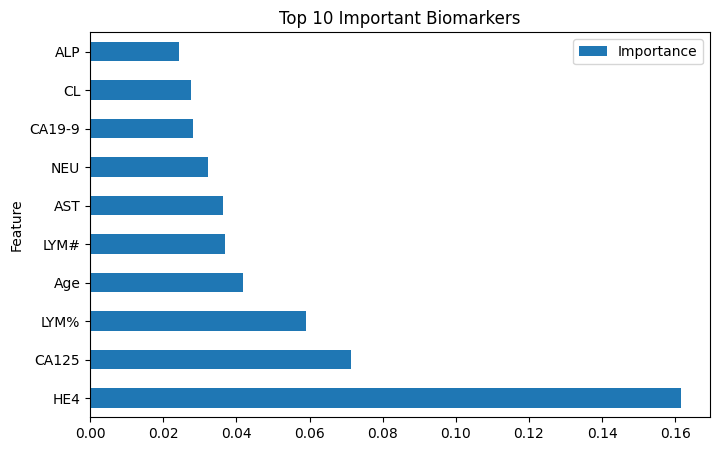


Model saved as ovarian_model.pkl


In [39]:
# ==============================
# 2. CLEAN DATA (remove > and <)
# ==============================
for col in data.columns:
    data[col] = data[col].astype(str).str.replace('>', '', regex=False)
    data[col] = data[col].astype(str).str.replace('<', '', regex=False)

# Convert to numeric
data = data.apply(pd.to_numeric, errors='ignore')

# ==============================
# 3. Features & Target
# ==============================
X = data.drop(["TYPE"], axis=1)
y = data["TYPE"]

# ==============================
# 4. Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# ==============================
# 5. Train Model
# ==============================
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

# ==============================
# 6. Predict
# ==============================
pred = model.predict(X_test)

# ==============================
# 7. Evaluation
# ==============================
print("Accuracy:", accuracy_score(y_test, pred))

print("\nClassification Report:")
print(classification_report(y_test, pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred))

# ==============================
# 8. Feature Importance
# ==============================
importance = model.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Biomarkers:")
print(feat_imp.head(10))

# ==============================
# 9. Graph
# ==============================
feat_imp.head(10).plot(
    x='Feature',
    y='Importance',
    kind='barh',
    figsize=(8,5)
)

plt.title("Top 10 Important Biomarkers")
plt.show()

# ==============================
# 10. Save Model
# ==============================
joblib.dump(model, "ovarian_model.pkl")
print("\nModel saved as ovarian_model.pkl")
